In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

plt.style.use('dark_background')

# One feature

## Create data

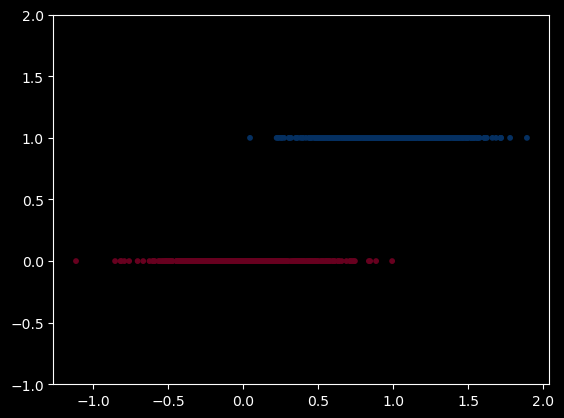

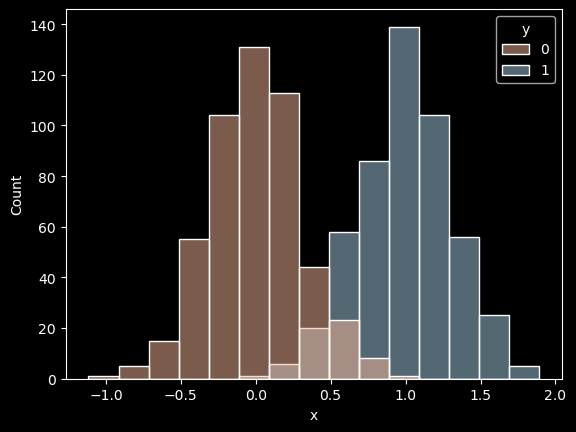

In [49]:
n_pts = 1000
std = 0.3

x1 = np.random.normal(0, std, n_pts//2)
x2 = np.random.normal(1, std, n_pts//2)
X = np.concatenate((x1,x2),axis=0).reshape(-1,1)

y1 = np.zeros(n_pts//2)
y2 = np.ones(n_pts//2)
y = np.concatenate((y1,y2),axis=0).astype(int)

plt.scatter(X[:,0],y,c=y, cmap='RdBu',s=10)
plt.ylim(-1,2)
plt.show()

df = pd.DataFrame( {"x":X[:,0], "y":y} )
sns.histplot( data=df, x='x', hue='y', bins=15, palette='RdBu' )
plt.show()

## Modeling

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y
)

print("Original data:")
print(pd.Series(y).value_counts())
print()
print("Training data:")
print(pd.Series(y_train).value_counts())
print()
print("Testing data:")
print(pd.Series(y_test).value_counts())

Original data:
0    500
1    500
Name: count, dtype: int64

Training data:
0    400
1    400
Name: count, dtype: int64

Testing data:
1    100
0    100
Name: count, dtype: int64


In [51]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train).astype(int)
y_test_pred  = model.predict(X_test).astype(int)

print("Testing labels:")
print(y_test)
print("Predicted labels:")
print(y_test_pred)

Testing labels:
[1 1 0 1 0 1 0 0 1 0 0 1 1 1 0 0 0 1 0 0 1 1 1 1 0 0 1 0 1 1 0 1 0 1 0 1 1
 0 1 1 1 0 0 0 0 1 1 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 1 0 1 1 0 1 1 1 1 0 1 0
 1 0 1 0 1 1 1 1 1 0 1 1 0 1 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 0 0 1 1 1 0 1 1
 1 1 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 0 0 0
 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 1
 0 0 1 1 0 0 1 1 1 1 1 0 0 1 1]
Predicted labels:
[1 1 0 1 0 1 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 1 0 1 0 1 0 1 1
 0 1 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 1 0
 0 0 1 0 1 1 1 1 1 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 1 0 1 1 0 0 1 1 1 0 1 1
 1 1 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 0 0 0
 1 0 1 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 1
 0 0 1 1 0 0 1 1 1 1 1 0 0 1 1]


In [52]:
y_test_pred_prob = model.predict_proba(X_test)
print(y_test_pred_prob[:5,:])

[[1.08441720e-03 9.98915583e-01]
 [1.32645679e-02 9.86735432e-01]
 [7.49911453e-01 2.50088547e-01]
 [7.56112005e-04 9.99243888e-01]
 [8.74150755e-01 1.25849245e-01]]


## Analysis

In [53]:
import math

def entropy( x, b ):
    s = 0
    for p in x:
        if p > 0:
            s += -p*math.log(p,b)
        # end
    # end
    return s
# end

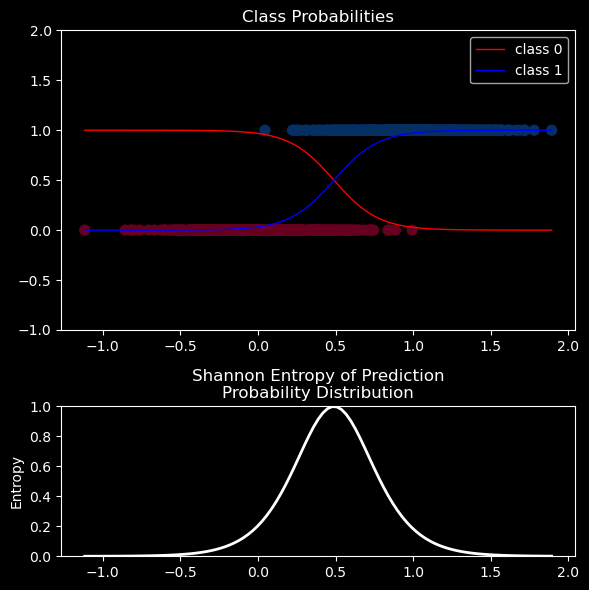

In [54]:
X_plot = np.linspace(X.min(), X.max(), 101).reshape(-1, 1)
prob_plot = model.predict_proba(X_plot)

entropy_values = np.array([entropy(p, 2) for p in prob_plot])

# Create figure and subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(6, 6), gridspec_kw={'height_ratios': [2, 1]})

# Upper plot: Probability of class 1
axes[0].scatter(X[:, 0], y, c=y, cmap='RdBu', s=50)
axes[0].plot(X_plot[:, 0], prob_plot[:,0], color='r', linewidth=1, label='class 0')
axes[0].plot(X_plot[:, 0], prob_plot[:,1], color='b', linewidth=1, label='class 1')
axes[0].set_ylim(-1, 2)
axes[0].set_title("Class Probabilities")
axes[0].legend()

# Lower plot: Shannon entropy
axes[1].plot(X_plot[:, 0], entropy_values, color='w', linewidth=2)
axes[1].set_ylim(0, np.log2(2))  # Maximum entropy for binary classification is log2(2) = 1
axes[1].set_ylabel("Entropy")
axes[1].set_title("Shannon Entropy of Prediction\nProbability Distribution")

# Adjust layout and show
plt.tight_layout()
plt.show()

### Info on classification metrics

https://chatgpt.com/share/67ad19a8-a8c4-8005-aefe-e98422a76873

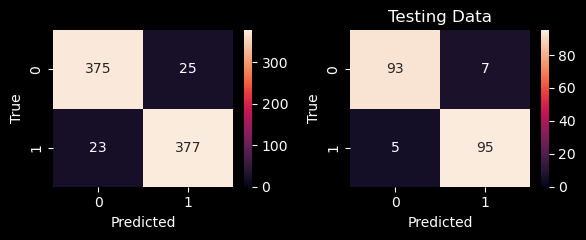

In [55]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrices
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Create subplots for side-by-side visualization
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 2.5))

# Plot confusion matrix for training data
sns.heatmap(conf_matrix_train, annot=True, vmin=0, fmt='d', ax=axes[0])
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("True")

# Plot confusion matrix for test data
sns.heatmap(conf_matrix_test, annot=True, vmin=0, fmt='d', ax=axes[1])
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("True")
axes[1].set_title("Testing Data")

# Show the plots
plt.tight_layout()
plt.show()

In [56]:
conf_matrix_train = conf_matrix_train.astype(float)
conf_matrix_test  = conf_matrix_test.astype(float)
for i in range(conf_matrix_train.shape[0]):
    conf_matrix_train[i,:] = conf_matrix_train[i,:] / conf_matrix_train[i,:].sum()
    conf_matrix_test[i,:]  = conf_matrix_test[i,:] / conf_matrix_test[i,:].sum()
# end

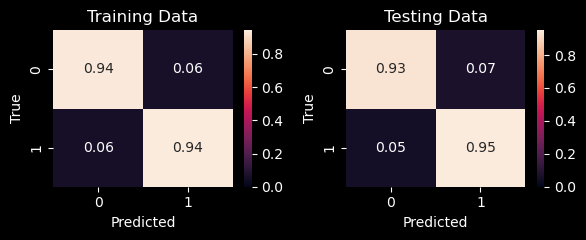

In [57]:
# Create subplots for side-by-side visualization
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 2.5))

# Plot confusion matrix for training data
sns.heatmap(conf_matrix_train, annot=True, vmin=0, fmt='.2f', ax=axes[0])
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("True")
axes[0].set_title("Training Data")

# Plot confusion matrix for test data
sns.heatmap(conf_matrix_test, annot=True, vmin=0, fmt='.2f', ax=axes[1])
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("True")
axes[1].set_title("Testing Data")

# Show the plots
plt.tight_layout()
plt.show()

In [58]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_train, y_train_pred)
precision = precision_score(y_train, y_train_pred)
recall = recall_score(y_train, y_train_pred)
f1 = f1_score(y_train, y_train_pred)

print("Training data:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")
print()

accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

print("Testing data:")
print(f"Accuracy:  {accuracy_test:.4f}")
print(f"Precision: {precision_test:.4f}")
print(f"Recall:    {recall_test:.4f}")
print(f"F1 Score:  {f1_test:.4f}")

Training data:
Accuracy:  0.9400
Precision: 0.9378
Recall:    0.9425
F1 Score:  0.9401

Testing data:
Accuracy:  0.9400
Precision: 0.9314
Recall:    0.9500
F1 Score:  0.9406


In [59]:
from sklearn.metrics import precision_recall_fscore_support

precision_train, recall_train, f1_train, support_train = precision_recall_fscore_support(y_train, y_train_pred)

print("Training data:")
print(f"Precision: {precision_train}")
print(f"Recall:    {recall_train}")
print(f"F1 Score:  {f1_train}")
print(f"Support:   {support_train}")
print()

precision_test, recall_test, f1_test, support_test = precision_recall_fscore_support(y_test, y_test_pred)

print("Testing data:")
print(f"Precision: {precision_test}")
print(f"Recall:    {recall_test}")
print(f"F1 Score:  {f1_test}")
print(f"Support:   {support_test}")

Training data:
Precision: [0.94221106 0.93781095]
Recall:    [0.9375 0.9425]
F1 Score:  [0.93984962 0.94014963]
Support:   [400 400]

Testing data:
Precision: [0.94897959 0.93137255]
Recall:    [0.93 0.95]
F1 Score:  [0.93939394 0.94059406]
Support:   [100 100]


In [60]:
from sklearn.metrics import classification_report

print("Training Data:")
print(classification_report(y_train, y_train_pred))
print()
print("Testing Data:")
print(classification_report(y_test, y_test_pred))

Training Data:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       400
           1       0.94      0.94      0.94       400

    accuracy                           0.94       800
   macro avg       0.94      0.94      0.94       800
weighted avg       0.94      0.94      0.94       800


Testing Data:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       100
           1       0.93      0.95      0.94       100

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200



# Two Features

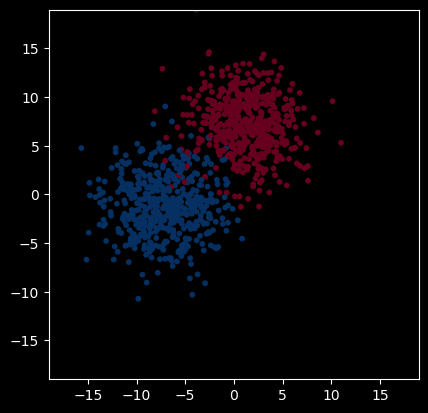

C:\Users\Graham West\anaconda3\envs\csci4900\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


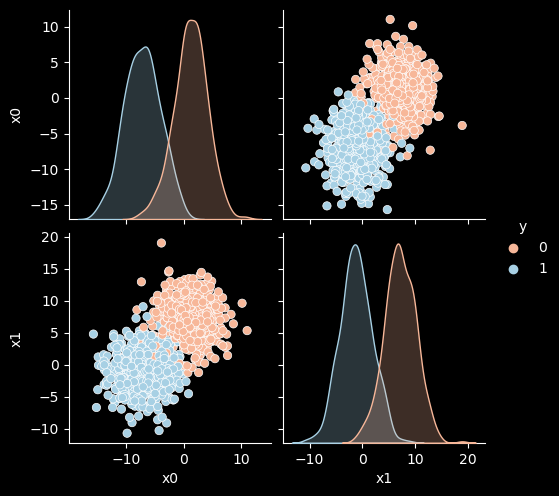

In [61]:
from sklearn.datasets import make_blobs

X, y = make_blobs(
    n_samples=1000,
    n_features=2,
    centers=2,
    cluster_std=3.0,
    random_state=1
)

X = X - X.mean()

MAX = np.max(np.abs(X))

plt.scatter(X[:,0], X[:,1], c=y, s=10, cmap="RdBu");
plt.xlim(-MAX,MAX)
plt.ylim(-MAX,MAX)
plt.gca().set_aspect('equal')
plt.show()

df = pd.DataFrame( {"x0":X[:,0], "x1":X[:,1], "y":y} )
sns.pairplot(df, hue='y', palette='RdBu')
plt.show()

## Modeling

In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y
)

print("Original data:")
print(pd.Series(y).value_counts())
print()
print("Training data:")
print(pd.Series(y_train).value_counts())
print()
print("Testing data:")
print(pd.Series(y_test).value_counts())

Original data:
0    500
1    500
Name: count, dtype: int64

Training data:
1    400
0    400
Name: count, dtype: int64

Testing data:
1    100
0    100
Name: count, dtype: int64


In [63]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train).astype(int)
y_test_pred  = model.predict(X_test).astype(int)

## Analysis

In [64]:
import math

def entropy( x, b ):
    s = 0
    for p in x:
        if p > 0:
            s += -p*math.log(p,b)
        # end
    # end
    return s
# end

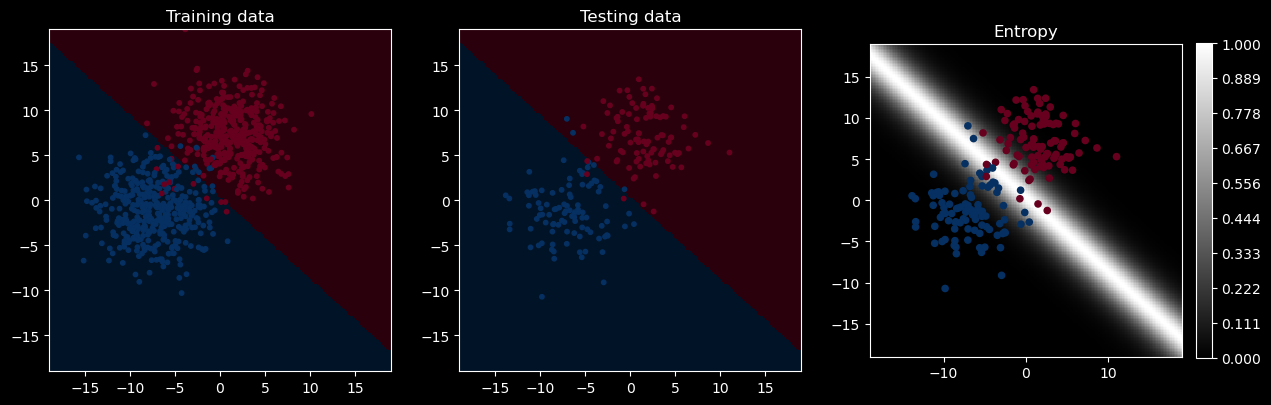

In [65]:
nGrid = 200
a1 = np.linspace(-MAX,MAX,nGrid)
a2 = np.linspace(-MAX,MAX,nGrid)

A1, A2 = np.meshgrid(a1,a2)
A1 = A1.flatten()
A2 = A2.flatten()
A = np.vstack((A1,A2)).T

B = model.predict(A)
B = B.reshape(nGrid,nGrid)
B = np.flipud(B)

prob_2D = model.predict_proba(A)
S = np.array([entropy(p, 2) for p in prob_2D])
S = S.reshape(nGrid,nGrid)
S = np.flipud(S)

extent = [-MAX,MAX,-MAX,MAX]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

cmap = "RdBu"
axes[0].imshow(B, interpolation='none', extent=extent,cmap=cmap, alpha=0.4)
axes[0].scatter(X_train[:,0], X_train[:,1], c=y_train, s=10, cmap=cmap);
axes[0].set_aspect('equal')
axes[0].set_title('Training data');

axes[1].imshow(B, interpolation='none', extent=extent,cmap=cmap, alpha=0.4)
axes[1].scatter(X_test[:,0], X_test[:,1], c=y_test, s=10, cmap=cmap);
axes[1].set_aspect('equal')
axes[1].set_title('Testing data');

im = axes[2].imshow(S, interpolation='none', extent=extent,cmap='gray')
axes[2].scatter(X_test[:,0], X_test[:,1], c=y_test, s=20, cmap=cmap);
axes[2].set_aspect('equal')
axes[2].set_title('Entropy')
cbar = fig.colorbar(im, ax=axes[2], fraction=0.046, pad=0.04)
cbar.set_ticks(np.linspace(0, math.log(y.max()+1,2), 10))

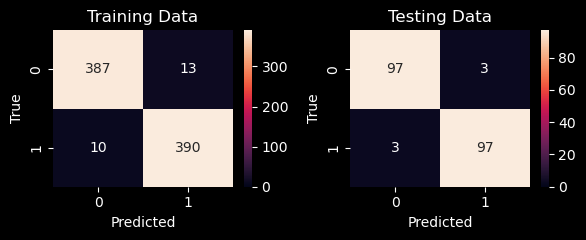

In [66]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrices
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Create subplots for side-by-side visualization
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 2.5))

# Plot confusion matrix for training data
sns.heatmap(conf_matrix_train, annot=True, vmin=0, fmt='d', ax=axes[0])
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("True")
axes[0].set_title("Training Data")

# Plot confusion matrix for test data
sns.heatmap(conf_matrix_test, annot=True, vmin=0, fmt='d', ax=axes[1])
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("True")
axes[1].set_title("Testing Data")

# Show the plots
plt.tight_layout()
plt.show()

In [67]:
conf_matrix_train = conf_matrix_train.astype(float)
conf_matrix_test  = conf_matrix_test.astype(float)
for i in range(conf_matrix_train.shape[0]):
    conf_matrix_train[i,:] = conf_matrix_train[i,:] / conf_matrix_train[i,:].sum()
    conf_matrix_test[i,:]  = conf_matrix_test[i,:] / conf_matrix_test[i,:].sum()
# end

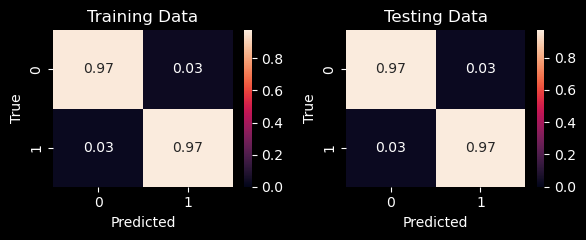

In [68]:
# Create subplots for side-by-side visualization
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 2.5))

# Plot confusion matrix for training data
sns.heatmap(conf_matrix_train, annot=True, vmin=0, fmt='.2f', ax=axes[0])
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("True")
axes[0].set_title("Training Data")

# Plot confusion matrix for test data
sns.heatmap(conf_matrix_test, annot=True, vmin=0, fmt='.2f', ax=axes[1])
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("True")
axes[1].set_title("Testing Data")

# Show the plots
plt.tight_layout()
plt.show()

In [69]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_train, y_train_pred)
precision = precision_score(y_train, y_train_pred, average=None)
recall = recall_score(y_train, y_train_pred, average=None)
f1 = f1_score(y_train, y_train_pred, average=None)

print("Training data:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision}")
print(f"Recall:    {recall}")
print(f"F1 Score:  {f1}")
print()

accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred, average=None)
recall_test = recall_score(y_test, y_test_pred, average=None)
f1_test = f1_score(y_test, y_test_pred, average=None)

print("Testing data:")
print(f"Accuracy:  {accuracy_test}")
print(f"Precision: {precision_test}")
print(f"Recall:    {recall_test}")
print(f"F1 Score:  {f1_test}")

Training data:
Accuracy:  0.9712
Precision: [0.97481108 0.96774194]
Recall:    [0.9675 0.975 ]
F1 Score:  [0.97114178 0.97135741]

Testing data:
Accuracy:  0.97
Precision: [0.97 0.97]
Recall:    [0.97 0.97]
F1 Score:  [0.97 0.97]


In [70]:
from sklearn.metrics import precision_recall_fscore_support

precision_train, recall_train, f1_train, support_train = precision_recall_fscore_support(y_train, y_train_pred)

print("Training data:")
print(f"Precision: {precision_train}")
print(f"Recall:    {recall_train}")
print(f"F1 Score:  {f1_train}")
print(f"Support:   {support_train}")
print()

precision_test, recall_test, f1_test, support_test = precision_recall_fscore_support(y_test, y_test_pred)

print("Testing data:")
print(f"Precision: {precision_test}")
print(f"Recall:    {recall_test}")
print(f"F1 Score:  {f1_test}")
print(f"Support:   {support_test}")

Training data:
Precision: [0.97481108 0.96774194]
Recall:    [0.9675 0.975 ]
F1 Score:  [0.97114178 0.97135741]
Support:   [400 400]

Testing data:
Precision: [0.97 0.97]
Recall:    [0.97 0.97]
F1 Score:  [0.97 0.97]
Support:   [100 100]


In [71]:
from sklearn.metrics import classification_report

print("Training Data:")
print(classification_report(y_train, y_train_pred))
print()
print("Testing Data:")
print(classification_report(y_test, y_test_pred))

Training Data:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       400
           1       0.97      0.97      0.97       400

    accuracy                           0.97       800
   macro avg       0.97      0.97      0.97       800
weighted avg       0.97      0.97      0.97       800


Testing Data:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       100
           1       0.97      0.97      0.97       100

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200

